In [34]:
import pandas as pd 
import seaborn as sns
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def visualize(img,title='picture'):
    if len(img.shape)==3 and img.shape[2]==1:
        cmap='gray'
    elif len(img.shape)==2:
        cmap='gray'
    else:
        cmap='viridis'
    plt.figure(figsize=(15, 15)) #figsize=(20, 10)
    plt.axis('off')
    plt.title(title)
    plt.imshow(img,cmap=cmap)

In [36]:
with open('data/test_cleaned/1.npy','rb') as f:
    img1=np.load(f)

img1[0][0]

0.9891953

In [37]:
img1[0][0],img1.shape

(0.9891953, (258, 540))

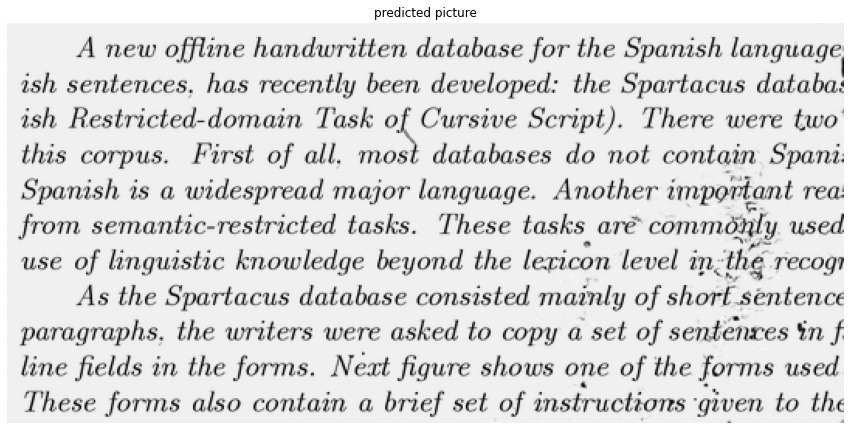

In [38]:
visualize(img1,'predicted picture')

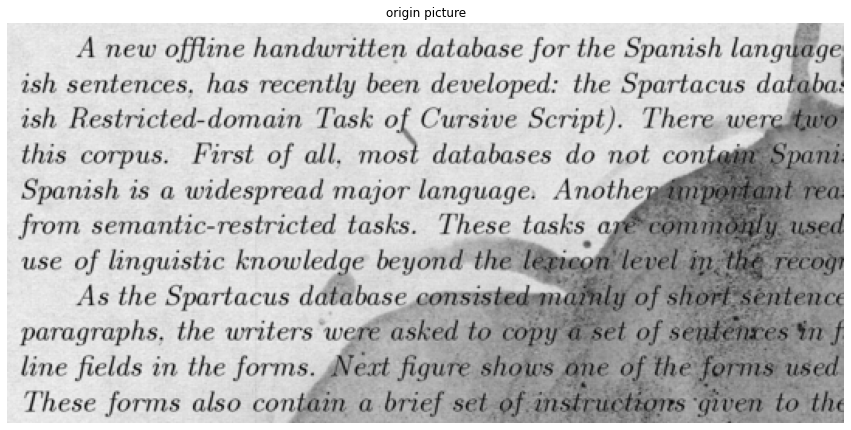

In [32]:
img2=cv2.imread('data/test/1.png',1)
visualize(img2,'origin picture')

In [26]:
from collections import Counter
def pixel_count(img):
    count=Counter(img.flatten().tolist())
    plt.bar(range(len(count)), count.values())
    plt.show()

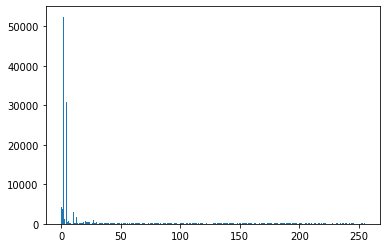

In [27]:
img1=np.array(img1*255,dtype=np.int8)
pixel_count(img1)

In [29]:
from module import LitModel,make_trsf
banngo=71
log_vnm=f'lightning_logs/version_{banngo}'
check_point=f'{log_vnm}/checkpoints/epoch=949-step=123499.ckpt'　# public score=0.01739
hparam=f'{log_vnm}/hparams.yaml'
model=LitModel.load_from_checkpoint(
        checkpoint_path=check_point,
        hparams_file=hparam,
        map_location=None,
        strict=False
        )
_,trsf=make_trsf(imgsize=( 540,420))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 96, 540, 420]           2,688
         LeakyReLU-2         [-1, 96, 540, 420]               0
            Conv2d-3         [-1, 96, 540, 420]          83,040
         LeakyReLU-4         [-1, 96, 540, 420]               0
            Conv2d-5         [-1, 96, 540, 420]          83,040
         LeakyReLU-6         [-1, 96, 540, 420]               0
            Conv2d-7         [-1, 96, 540, 420]          83,040
         LeakyReLU-8         [-1, 96, 540, 420]               0
            Conv2d-9         [-1, 96, 540, 420]          83,040
        LeakyReLU-10         [-1, 96, 540, 420]               0
           Conv2d-11          [-1, 1, 540, 420]             865
Total params: 335,713
Trainable params: 335,713
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 2.60
Forward/

In [30]:
import torch
x_tensor=trsf(image=img2)['image'][None].float()/255

y=model(x_tensor)[0]

y=y.permute(1,2,0).detach().numpy().squeeze()
y.shape

(258, 540)

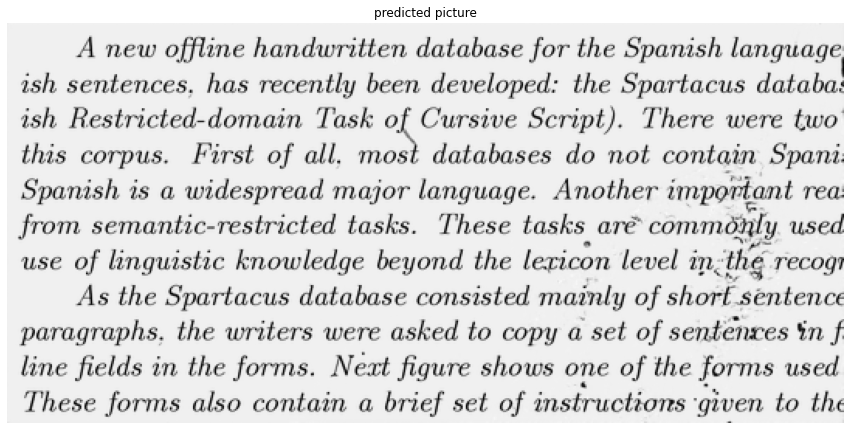

In [33]:
visualize(y,'predicted picture')